In [2]:
import pandas as pd
df=pd.read_csv("movies.csv")

In [2]:
df.head()

,title,industry,release_year,imdb_rating,studio,budget,revenue,unit,currency,language
0,Pather Panchali,Bollywood,1955,8.3,Government of West Bengal,70000.0,100000.0,Thousands,INR,Bengali
1,Doctor Strange in the Multiverse of Madness,Hollywood,2022,7.0,Marvel Studios,200.0,954.8,Millions,USD,English
2,Thor: The Dark World,Hollywood,2013,6.8,Marvel Studios,165.0,644.8,Millions,USD,English
3,Thor: Ragnarok,Hollywood,2017,7.9,Marvel Studios,180.0,854.0,Millions,USD,English
4,Thor: Love and Thunder,Hollywood,2022,6.8,Marvel Studios,250.0,670.0,Millions,USD,English


In [3]:
df.isnull()

,title,industry,release_year,imdb_rating,studio,budget,revenue,unit,currency,language
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False


In [4]:
df.isnull().sum()

title           0
industry        0
release_year    0
imdb_rating     1
studio          3
budget          0
revenue         0
unit            0
currency        0
language        0
dtype: int64

In [6]:
df.fillna(method="ffill",inplace=True) #inplace means update my dataframe

In [7]:
df.isnull().sum()

title           0
industry        0
release_year    0
imdb_rating     0
studio          0
budget          0
revenue         0
unit            0
currency        0
language        0
dtype: int64

## Dealing with duplicate

In [9]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
dtype: bool

In [11]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37     True
38     True
dtype: bool

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.duplicated().sum()

0

## Dealing with Outliers

In [31]:
import plotly.express as px

In [18]:
#!pip install plotly for ploting

In [37]:
fg = px.box(df,y="budget")
fg.show()

In [38]:
Q1 = df.budget.quantile(0.25)
Q3 = df.budget.quantile(0.75)
IQR = Q3-Q1

In [39]:
LowerFence = Q1-1.5*IQR
UpperFency = Q3+1.5*IQR
FilteredDF = df[(df.budget>=LowerFence) & (df.budget<=UpperFency)]

In [41]:
fg = px.box(FilteredDF,y="budget")
fg.show()

In [26]:
hollywood = df[df.industry=="Hollywood"].budget.max()
bollywood = df[df.industry=="Bollywood"].budget.max()

In [28]:
print(F"Hollywood {hollywood} \nBollywood {bollywood}")

Hollywood 400.0 
Bollywood 70000.0


In [3]:
grouping =df.groupby(["studio", "industry"])
for st,val in grouping:
    print("studio", st)
    print(val.studio.count())

studio ('20th Century Fox', 'Hollywood')
1
studio ('Arka Media Works', 'Bollywood')
1
studio ('Castle Rock Entertainment', 'Hollywood')
1
studio ('Columbia Pictures', 'Hollywood')
1
studio ('DVV Entertainment', 'Bollywood')
1
studio ('Dharma Productions', 'Bollywood')
3
studio ('Government of West Bengal', 'Bollywood')
2
studio ('Hombale Films', 'Bollywood')
1
studio ('Liberty Films', 'Hollywood')
1
studio ('Marvel Studios', 'Hollywood')
8
studio ('Mythri Movie Makers', 'Bollywood')
1
studio ('Paramount Pictures', 'Hollywood')
2
studio ('Salman Khan Films', 'Bollywood')
2
studio ('Syncopy', 'Hollywood')
1
studio ('Universal Pictures', 'Hollywood')
2
studio ('Universal Pictures  ', 'Hollywood')
1
studio ('Vinod Chopra Films', 'Bollywood')
3
studio ('Vinod Chopra Productions', 'Bollywood')
1
studio ('Warner Bros. Pictures', 'Hollywood')
1
studio ('Yash Raj Films', 'Bollywood')
1
studio ('Zee Studios', 'Bollywood')
1


In [4]:
grouping.size()

studio                     industry 
20th Century Fox           Hollywood    1
Arka Media Works           Bollywood    1
Castle Rock Entertainment  Hollywood    1
Columbia Pictures          Hollywood    1
DVV Entertainment          Bollywood    1
Dharma Productions         Bollywood    3
Government of West Bengal  Bollywood    2
Hombale Films              Bollywood    1
Liberty Films              Hollywood    1
Marvel Studios             Hollywood    8
Mythri Movie Makers        Bollywood    1
Paramount Pictures         Hollywood    2
Salman Khan Films          Bollywood    2
Syncopy                    Hollywood    1
Universal Pictures         Hollywood    2
Universal Pictures         Hollywood    1
Vinod Chopra Films         Bollywood    3
Vinod Chopra Productions   Bollywood    1
Warner Bros. Pictures      Hollywood    1
Yash Raj Films             Bollywood    1
Zee Studios                Bollywood    1
dtype: int64

<Axes: ylabel='studio'>

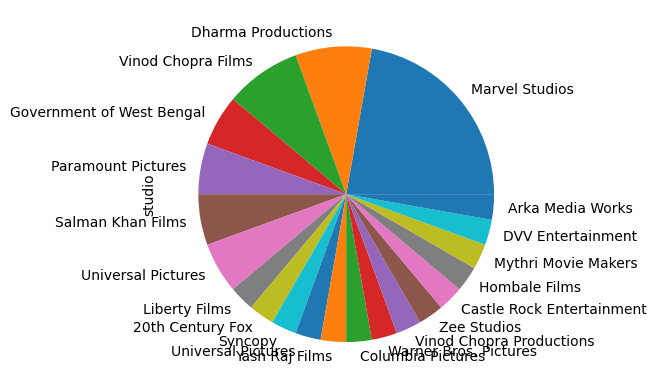

In [7]:
df.studio.value_counts()
df.studio.value_counts().plot(kind="pie")

In [11]:
city1 = pd.DataFrame({
    "city": ["Marko", "Jawhar","Kismayo" ,"Mogadishu"],
    "population" : [4785, 2895, 4590, 26890]
})

In [17]:
city2 = pd.DataFrame({
    "city": ["Marko", "Jawhar","Kismayo" ,"Mogadishu"],
    "Temperature" : [12, 35, 23, 27]
})

In [13]:
city1

,city,population
0,Marko,4785
1,Jawhar,2895
2,Kismayo,4590
3,Mogadishu,26890


In [18]:
city2

,city,Temperature
0,Marko,12
1,Jawhar,35
2,Kismayo,23
3,Mogadishu,27


In [24]:
somaliCities = pd.merge(city1,city2,on="city")

In [25]:
somaliCities

,city,population,Temperature
0,Marko,4785,12
1,Jawhar,2895,35
2,Kismayo,4590,23
3,Mogadishu,26890,27


In [26]:
somaliCities.to_csv("Cities.csv")

In [27]:
#!pip install openpyx1 for export